In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta

In [3]:
df = pd.read_csv(r'C:\Users\V0V01S7\Downloads\bquxjob_792c1722_181872f0f81.csv')

In [4]:
df = df[['ACTV_START_TS','ACTL_ACTV_END_TS','ACTV_DUR_MIN_QTY']]

In [5]:
df = df.dropna()

In [6]:
df = df.reset_index(drop=True)

In [7]:
df['ACTV_START_TS'] = pd.to_datetime(df['ACTV_START_TS'])
df['ACTL_ACTV_END_TS'] = pd.to_datetime(df['ACTL_ACTV_END_TS'])

In [8]:
df['ACTV_START_DATE'] = df['ACTV_START_TS'].apply(lambda x: x.date())
df['ACTV_END_DATE'] = df['ACTL_ACTV_END_TS'].apply(lambda x: x.date())
df['ACTV_START_TIME'] = df['ACTV_START_TS'].apply(lambda x: x.time())
df['ACTV_END_TIME'] = df['ACTL_ACTV_END_TS'].apply(lambda x: x.time())

In [9]:
df.head()

,ACTV_START_TS,ACTL_ACTV_END_TS,ACTV_DUR_MIN_QTY,ACTV_START_DATE,ACTV_END_DATE,ACTV_START_TIME,ACTV_END_TIME
0,2021-08-20 11:22:01.958,2021-08-20 11:46:24.031,24.38,2021-08-20,2021-08-20,11:22:01.958000,11:46:24.031000
1,2021-08-20 09:33:13.767,2021-08-20 11:21:53.115,108.67,2021-08-20,2021-08-20,09:33:13.767000,11:21:53.115000
2,2021-08-20 16:07:48.314,2021-08-20 16:10:30.310,2.70,2021-08-20,2021-08-20,16:07:48.314000,16:10:30.310000
3,2021-08-20 16:40:19.276,2021-08-20 18:11:47.686,91.47,2021-08-20,2021-08-20,16:40:19.276000,18:11:47.686000
4,2021-08-20 09:10:23.666,2021-08-20 09:12:37.247,2.23,2021-08-20,2021-08-20,09:10:23.666000,09:12:37.247000


In [100]:
test_df = df[0:50]


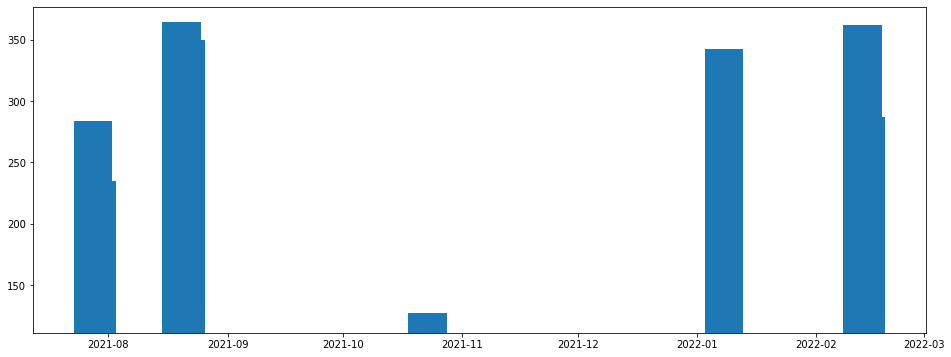

In [107]:
fig, ax = plt.subplots(1, figsize=(16,6))
ax.bar(test_df.ACTV_START_DATE, test_df.ACTV_DUR_MIN_QTY,width=10,bottom = 111)#,left=df[0:5].ACTV_START_TIME.hour)
ax.xaxis_date()
plt.show()

In [66]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from datetime import datetime
import pandas as pd

In [10]:
test_df.rename(columns={"ACTV_START_DATE": "Task", "ACTV_START_TIME":"Start", "ACTV_END_TIME": " Finish"})

NameError: name 'test_df' is not defined

In [76]:
fig = ff.create_gantt(test_df,group_tasks=True)
go.FigureWidget(fig)

PlotlyError: The columns in your dataframe must include the following keys: Task, Start, Finish

In [87]:
test_df = (df.groupby(['ACTV_START_DATE','ACTV_START_TS']).agg('ACTL_ACTV_END_TS'))

In [88]:
test_df.head()

0      2021-08-20 11:46:24.031
1      2021-08-20 11:21:53.115
2      2021-08-20 16:10:30.310
3      2021-08-20 18:11:47.686
4      2021-08-20 09:12:37.247
                 ...          
1876   2021-12-03 10:58:12.045
1877   2021-12-03 07:46:03.688
1878   2021-12-03 17:10:38.097
1879   2021-12-03 18:16:33.620
1880   2021-12-03 19:00:00.000
Name: ACTL_ACTV_END_TS, Length: 1881, dtype: datetime64[ns]

In [65]:
ttime = df.groupby(['ACTV_START_DATE']).sum()
ttime

,ACTV_DUR_MIN_QTY
ACTV_START_DATE,
2021-07-27,185.29
2021-07-28,257.93
2021-07-29,693.86
2021-07-30,646.26
2021-07-31,560.81
...,...
2022-06-16,1.38
2022-06-17,438.10
2022-06-18,85.43


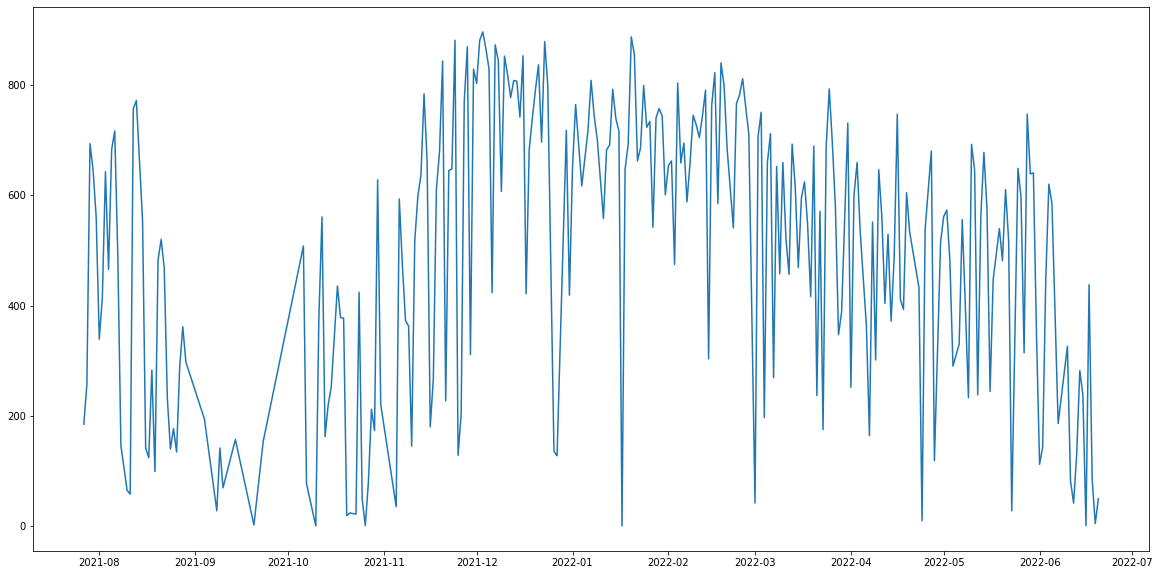

In [66]:
plt.figure(figsize=(20,10))
plt.plot(ttime)

In [67]:
import calendar

In [68]:
calendar.day_name[df.ACTV_START_DATE[0].weekday()]

'Friday'

In [69]:
ttime['day'] = ttime["ACTV_START_DATE"].apply(lambda x: calendar.day_name[x.weekday()])
ttime.head()

KeyError: 'ACTV_START_DATE'

In [51]:
type(ttime)

pandas.core.frame.DataFrame